<a href="https://colab.research.google.com/github/prakritibanik/machinelearning/blob/master/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson 1: Machine learning to deep learning 

Codes from lesson 1 of Udacity Deep Learning course

## Import Packages

In [0]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2
%matplotlib inline

[0.8360188  0.11314284 0.05083836]


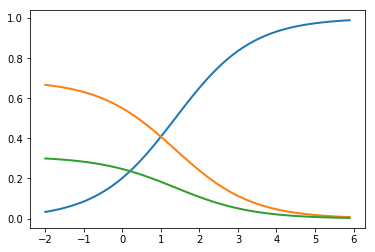

In [5]:
"""Softmax."""

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/ np.sum(np.exp(x), axis=0)

print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

###HW1. Find eigenvalue and eigen vector from a Matix using numpy. 

In [6]:
A = np.array([[-2, 1, 0],[1, -2, 1], [0, 1, -2]])
print(A)
print(A.shape)

[[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]]
(3, 3)


Get eigenvectors and eigenvalues using np.linalg

In [7]:
w, v = np.linalg.eig(A) #w is eigenvalue, v is eigenvectors
print(w)
print(v)
print(v.shape[0])

[-3.41421356 -2.         -0.58578644]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -4.05925293e-16  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]
3


Check if $Av = \lambda v$ for all eigenvalues and eigenvectors

In [8]:
for i in range(v.shape[0]) :
  print(np.dot(A,v[:,i]))
  print(np.dot(w[i],v[:,i]))

[-1.70710678  2.41421356 -1.70710678]
[-1.70710678  2.41421356 -1.70710678]
[-1.41421356e+00  1.22124533e-15  1.41421356e+00]
[-1.41421356e+00  8.11850587e-16  1.41421356e+00]
[-0.29289322 -0.41421356 -0.29289322]
[-0.29289322 -0.41421356 -0.29289322]


###HW1. Problem 3  Construct a simple neural netwrok which will implement the following truth table.

|  $x1$  |  $x2$  |  $x3$  |  $y$   |
|------------|-------------|-------------|------------|



In [24]:
x=np.array([[0,0,0],[1,0,0],[0,1,0],[1,1,0],[0,0,1],[1,0,1],[0,1,1],[1,1,1]])
y=np.array([0,0,1,1,0,0,0,1])
print(x)
print(y)
print(x.T)

[[0 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 0 1]
 [1 0 1]
 [0 1 1]
 [1 1 1]]
[0 0 1 1 0 0 0 1]
[[0 1 0 1 0 1 0 1]
 [0 0 1 1 0 0 1 1]
 [0 0 0 0 1 1 1 1]]


To build a simple neural network we need to decide layers, bias and activation function. Lets assume we have a a 2 layers neural network

In [25]:
#define first layer weights
w1 = np.array([[-10,40,-35],[10,40,40],[-15,-15,20]])
# define bias
b1 = np.array([-10, -20,5]).reshape(1,3)

#define second layer weights
w2 = np.array([-10,40,-35])
# define bias
b2 = -10

print('w1:\n', w1)
print('b1;\n', b1)
print('w2:\n', w2)
print('b2:\n', b2)

w1:
 [[-10  40 -35]
 [ 10  40  40]
 [-15 -15  20]]
b1;
 [[-10 -20   5]]
w2:
 [-10  40 -35]
b2:
 -10


In [0]:
#define the sigmoid function
sigma = lambda z : 1 if z>=0 else (0 if z<0 else 0.5)

def sigmoid(x):
  if x>=0:
    return 1
  else:
    return 0

In [19]:
layer1 = np.dot(w1, x.T)+b1.T
print(layer1)

output1 = np.array([[sigmoid(z) for z in i] for i in layer1]).T
print(output1)

[[-10 -20  30  20 -45 -55  -5 -15]
 [-20 -10  20  30  20  30  60  70]
 [  5 -10 -10 -25  25  10  10  -5]]
[[0 0 1]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 0]]


In [26]:
layer2 = np.dot(w2,output1.T)+b2
final_output = np.array([sigmoid(z) for z in layer2]).T
print(final_output)

[0 0 1 1 0 0 0 1]
